In [1]:
import import_ipynb
from preprocess import *
from plots import *
from minima import *
from algorithms import *

# IMPORT NECESSARY MODULES
import os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

import ast

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from itertools import permutations

folder_path = "/Users/ramonjr.comendador/cs198-protein-folding/datasets"

In [2]:
# Step 1: Obtain necessary CSV files and convert to 3D matrices
csv_files = get_csv(folder_path)
print(csv_files)
matrices = csv_to_3d_matrix(folder_path, csv_files) 
energy_surfaces = dict(zip(csv_files, matrices))
print(energy_surfaces)

['W.csv', 'V.csv', 'A.csv', 'C.csv', 'T.csv', 'Q.csv', 'F.csv', 'G.csv', 'R.csv', 'E.csv', 'D.csv', 'S.csv', 'I.csv', 'H.csv', 'K.csv', 'X.csv', 'Y.csv', 'N.csv', 'L.csv', 'M.csv']
{'W.csv': array([[4.45122949, 4.28025283, 4.02794071, ..., 5.18681369, 4.76368714,
        4.45122949],
       [4.61804534, 4.44492099, 4.18982125, ..., 5.35528348, 4.93110696,
        4.61804228],
       [4.83861225, 4.66262803, 4.40380028, ..., 5.5783367 , 5.15260521,
        4.83860546],
       ...,
       [4.35574082, 4.18737288, 3.93861497, ..., 5.08646606, 4.66620294,
        4.35574402],
       [4.41684181, 4.24691049, 3.99603067, ..., 5.15033754, 4.72843765,
        4.41684313],
       [4.45122949, 4.28025283, 4.02794071, ..., 5.18681369, 4.76368714,
        4.45122949]]), 'V.csv': array([[12.47377928, 12.25763549, 11.94854929, ..., 13.19724989,
        12.77926504, 12.47377928],
       [12.79881645, 12.58174673, 12.27148745, ..., 13.52184358,
        13.10408472, 12.79881565],
       [13.24279357, 1

In [3]:
df1 = pd.read_csv("/Users/ramonjr.comendador/cs198-protein-folding/rework/path_metrics_1-1.csv")
df8 = pd.read_csv("/Users/ramonjr.comendador/cs198-protein-folding/rework/path_metrics_1-0.8.csv")
df6 = pd.read_csv("/Users/ramonjr.comendador/cs198-protein-folding/rework/path_metrics_1-0.6.csv")
df4 = pd.read_csv("/Users/ramonjr.comendador/cs198-protein-folding/rework/path_metrics_1-0.4.csv")
df2 = pd.read_csv("/Users/ramonjr.comendador/cs198-protein-folding/rework/path_metrics_1-0.2.csv")
df0 = pd.read_csv("/Users/ramonjr.comendador/cs198-protein-folding/rework/path_metrics_1-0.csv")

# df_list = [df1, df8, df6, df4, df2, df0]
# df_list = [df1]

In [4]:
combined_csv = df1[['protein_name', 'start', 'end']].copy()

combined_csv['path1'] = df1['path']
combined_csv['path8'] = df8['path']
combined_csv['path6'] = df6['path']
combined_csv['path4'] = df4['path']
combined_csv['path2'] = df2['path']
combined_csv['path0'] = df0['path']

print(combined_csv)

combined_df = [combined_csv]


     protein_name      start         end  \
0           W.csv  (249, 15)   (11, 169)   
1           W.csv  (249, 15)   (78, 175)   
2           W.csv  (249, 15)    (92, 15)   
3           W.csv  (249, 15)   (106, 74)   
4           W.csv  (249, 15)   (121, 56)   
...           ...        ...         ...   
2731        M.csv  (249, 29)  (150, 249)   
2732        M.csv  (249, 29)  (168, 249)   
2733        M.csv  (249, 29)   (175, 67)   
2734        M.csv  (249, 29)   (224, 17)   
2735        M.csv  (249, 29)  (226, 178)   

                                                  path1  \
0     [(249, 15), (248, 14), (247, 13), (246, 12), (...   
1     [(249, 15), (248, 14), (247, 13), (246, 12), (...   
2     [(249, 15), (0, 15), (1, 15), (2, 16), (3, 16)...   
3     [(249, 15), (249, 16), (248, 17), (247, 18), (...   
4     [(249, 15), (249, 16), (248, 17), (247, 18), (...   
...                                                 ...   
2731  [(249, 29), (249, 28), (249, 27), (249, 26), (...   

In [5]:
combined_csv.to_csv('finalized_plots.csv', index=False)

KeyboardInterrupt: 

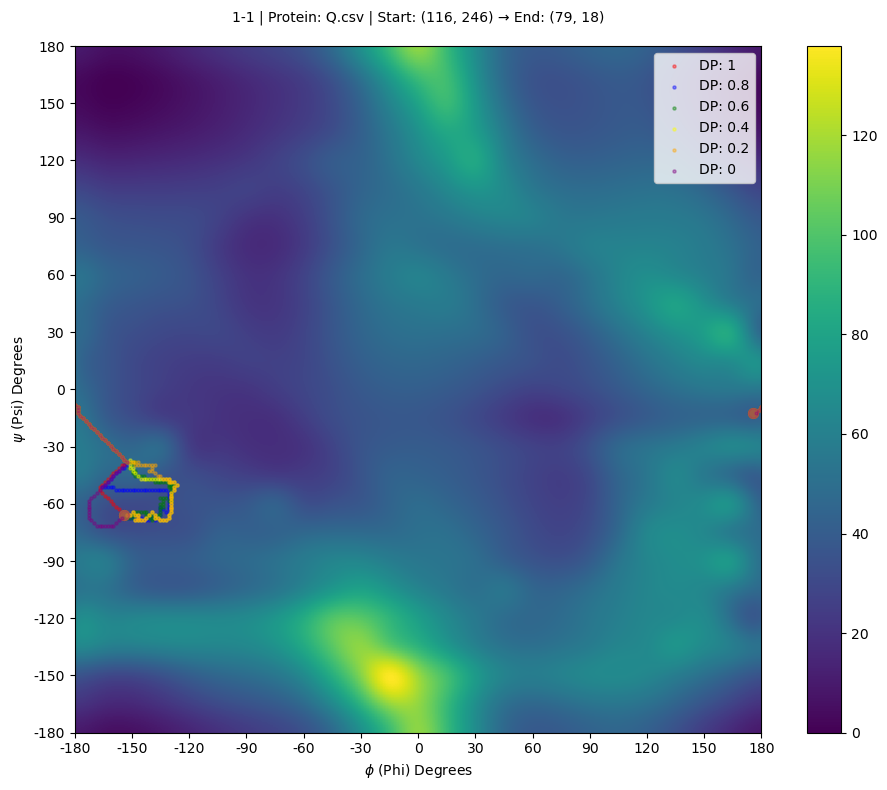

In [ ]:
for index, df in enumerate(combined_df):
    for idx, row in df.iterrows():
        protein_name = row['protein_name']
        
        if protein_name not in energy_surfaces:
            print(f"Protein {protein_name} not found in dict.")
            continue

        surface = energy_surfaces[protein_name]

        try:
            path1 = ast.literal_eval(row['path1'])
            path8 = ast.literal_eval(row['path8'])
            path6 = ast.literal_eval(row['path6'])
            path4 = ast.literal_eval(row['path4'])
            path2 = ast.literal_eval(row['path2'])
            path0 = ast.literal_eval(row['path0'])
        except Exception as e:
            print(f"Failed to parse path for {protein_name}: {e}")
            continue

        # Extract row and column indices
        y_vals1, x_vals1 = zip(*path1)
        y_vals8, x_vals8 = zip(*path8)
        y_vals6, x_vals6 = zip(*path6)
        y_vals4, x_vals4 = zip(*path4)
        y_vals2, x_vals2 = zip(*path2)
        y_vals0, x_vals0 = zip(*path0)

        # Plot
        fig, ax = plt.subplots(figsize=(10,8))
        im = ax.imshow(surface, origin='lower', cmap='viridis', extent=[-180, 180, -180, 180])
        cbar = fig.colorbar(im, ax = ax)

        # scale x and y values
        x_vals1_scaled = (np.array(x_vals1) / 249) * 360 - 180
        y_vals1_scaled = (np.array(y_vals1) / 249) * 360 - 180

        ax.scatter(x_vals1_scaled[1:-1], y_vals1_scaled[1:-1], color='red', s=5, label="DP: 1", alpha=0.6)
        ax.scatter(x_vals1_scaled[0], y_vals1_scaled[0], color='red', s=50, alpha=0.6)
        ax.scatter(x_vals1_scaled[-1], y_vals1_scaled[-1], color='red', s=50, alpha=0.6)

        x_vals8_scaled = (np.array(x_vals8) / 249) * 360 - 180
        y_vals8_scaled = (np.array(y_vals8) / 249) * 360 - 180

        ax.scatter(x_vals8_scaled[1:-1], y_vals8_scaled[1:-1], color='blue', s=5, label="DP: 0.8", alpha=0.6)
        ax.scatter(x_vals8_scaled[0], y_vals8_scaled[0], color='blue', s=50, alpha=0.6)
        ax.scatter(x_vals8_scaled[-1], y_vals8_scaled[-1], color='blue', s=50, alpha=0.6)

        x_vals6_scaled = (np.array(x_vals6) / 249) * 360 - 180
        y_vals6_scaled = (np.array(y_vals6) / 249) * 360 - 180

        ax.scatter(x_vals6_scaled[1:-1], y_vals6_scaled[1:-1], color='green', s=5, label="DP: 0.6", alpha=0.6)
        ax.scatter(x_vals6_scaled[0], y_vals6_scaled[0], color='green', s=50, alpha=0.6)
        ax.scatter(x_vals6_scaled[-1], y_vals6_scaled[-1], color='green', s=50, alpha=0.6)

        x_vals4_scaled = (np.array(x_vals4) / 249) * 360 - 180
        y_vals4_scaled = (np.array(y_vals4) / 249) * 360 - 180

        ax.scatter(x_vals4_scaled[1:-1], y_vals4_scaled[1:-1], color='yellow', s=5, label="DP: 0.4", alpha=0.6)
        ax.scatter(x_vals4_scaled[0], y_vals4_scaled[0], color='yellow', s=50, alpha=0.6)
        ax.scatter(x_vals4_scaled[-1], y_vals4_scaled[-1], color='yellow', s=50, alpha=0.6)

        x_vals2_scaled = (np.array(x_vals2) / 249) * 360 - 180
        y_vals2_scaled = (np.array(y_vals2) / 249) * 360 - 180

        ax.scatter(x_vals2_scaled[1:-1], y_vals2_scaled[1:-1], color='orange', s=5, label="DP: 0.2", alpha=0.6)
        ax.scatter(x_vals2_scaled[0], y_vals2_scaled[0], color='orange', s=50, alpha=0.6)
        ax.scatter(x_vals2_scaled[-1], y_vals2_scaled[-1], color='orange', s=50, alpha=0.6)

        x_vals0_scaled = (np.array(x_vals0) / 249) * 360 - 180
        y_vals0_scaled = (np.array(y_vals0) / 249) * 360 - 180

        ax.scatter(x_vals0_scaled[1:-1], y_vals0_scaled[1:-1], color='purple', s=5, label="DP: 0", alpha=0.6)
        ax.scatter(x_vals0_scaled[0], y_vals0_scaled[0], color='purple', s=50, alpha=0.6)
        ax.scatter(x_vals0_scaled[-1], y_vals0_scaled[-1], color='purple', s=50, alpha=0.6)

        # Add ticks to the scatter plot axes
        ax.set_xticks(np.linspace(-180, 180, 13))
        ax.set_yticks(np.linspace(-180, 180, 13))

        # Add tick labels from -180 to 180
        ax.set_xticklabels(['-180', '-150', '-120', '-90', '-60', '-30', '0', '30', '60', '90', '120', '150', '180'])
        ax.set_yticklabels(['-180', '-150', '-120', '-90', '-60', '-30', '0', '30', '60', '90', '120', '150', '180'])

        ax.set_xlim(-180, 180)
        ax.set_ylim(-180, 180)


        # Full title with CSV filename and DataFrame info
        title = (
            f"{idxtopenalty(index)} | Protein: {protein_name} | Start: {row['start']} → End: {row['end']}\n"
        )
        plt.title(title, fontsize=10)
        plt.xlabel(r'$\phi$ (Phi) Degrees')
        plt.ylabel(r'$\psi$ (Psi) Degrees')
        ax.legend()
        plt.tight_layout()
        # plt.show()
        fig.savefig(f"plot_files\\{protein_name} - {row['start']}, {row['end']}.png")
        plt.close()